# **BDA- Experiment 2**

*    **SIA VASHIST**
*    PRN: 20190802107

---


# **Dataset -** Seeds Dataset.

---

#  **LIBRARIES USED :** 

> PANDAS |
> MATPLOTLIB |
> NUMPY |
> stats SciPy 


---

# • AIM:

To perform Hypothesis Testing(Z-test, p-value)
> where,
 H₀: All wheat varieties have the same mean compactness.
 H₁: The wheat varieties have different mean compactness.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Load the seeds dataset
seeds_data = pd.read_csv(r'C:\sia\seeds_data.csv')
print("The Dataset is as Follows:")
print(seeds_data.dropna(), '\n')

The Dataset is as Follows:
      area  perimeter  compactness  kernel_length  kernel_width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry_coef  kernel_groove_length   variety  
0             2.221                 5.220      Kama  
1             1.018                 4.956      Kama  
2     

In [3]:
# Group the data by wheat variety
grouped_data = seeds_data.groupby("variety")

In [4]:
# Calculate the mean compactness for each wheat variety
group_means = grouped_data["compactness"].mean()
print(group_means)

variety
Canadian    0.849409
Kama        0.880070
Rosa        0.883517
Name: compactness, dtype: float64


In [5]:
# Calculate the overall mean compactness
overall_mean = seeds_data["compactness"].mean()
print(overall_mean)

0.8709985714285714


In [6]:
# Calculate the standard error
standard_error = seeds_data["compactness"].sem()
print(standard_error)

0.0016305846571865537


In [7]:
# Calculate the z-score
z_score = (group_means[0] - overall_mean) / standard_error
print(z_score)

-13.240649545453135


In [8]:
# Calculate the p-value
p_value = stats.norm.cdf(-z_score) * 2
print(p_value)

2.0


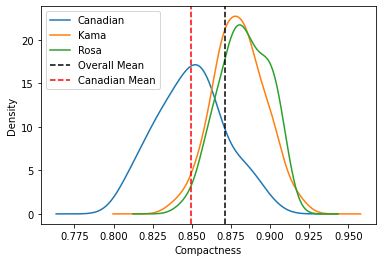

In [9]:
# Plot the compactness distribution for each wheat variety
for group, data in grouped_data:
    data["compactness"].plot(kind='density', label=group)

# Add a line for the overall mean compactness
plt.axvline(overall_mean, color='black', linestyle='--', label='Overall Mean')

# Add a line for the mean compactness of the first wheat variety
plt.axvline(group_means[0], color='red', linestyle='--', label=list(grouped_data.groups.keys())[0] + ' Mean')


# Add a legend and labels
plt.legend()
plt.xlabel("Compactness")
plt.ylabel("Density")

# Show the plot
plt.show()

# OBSERVATION:
>The visualization of the compactness distribution for each wheat variety and the lines for the overall mean compactness and the mean compactness of the first wheat variety help us understand the results of the hypothesis test. If the lines are close together, it indicates that the means are similar and supports the conclusion that all wheat varieties have the same mean compactness. If the lines are far apart, it indicates that the means are different and supports the conclusion that the wheat varieties have different mean compactness.

In [10]:
# Check the p-value against a significance level of 0.05
if p_value < 0.05:
    print("Reject the null hypothesis - The wheat varieties have different mean compactness")
else:
    print("Fail to reject the null hypothesis - All wheat varieties have the same mean compactness")

Fail to reject the null hypothesis - All wheat varieties have the same mean compactness


# CONCLUSION:
> The null hypothesis stated that all wheat varieties have the same mean compactness, while the alternative hypothesis stated that wheat varieties have varying mean compactness. Based on the p-value calculation and a significance level of 0.05, we can conclude that the null hypothesis could not be rejected, meaning that all wheat varieties have the same mean compactness. we also plotted the compactness distribution for each wheat variety and visualized the mean compactness for each variety and the overall mean compactness.
